In [1]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load frozen lake env and change to deterministic behavior
gym.envs.register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True},
    max_episode_steps=100,
)

In [3]:
env = gym.make('FrozenLakeNotSlippery-v0')


In [4]:
# reset the environment
obs = env.reset()

print(env.action_space)
print(env.observation_space)

#env.render('rgb_array')
_ = env.render()

Discrete(4)
Discrete(16)

SFFF
FHFH
FFFH
HFFG


In [5]:
action = env.action_space.sample()
print(action)

0


In [6]:
curent_state = env.reset()
done = False

current_state, reward, done, info = env.step(env.action_space.sample())
print('state: ', current_state)
print('reward: ', reward)
print('done: ', done)
print('info: ', info)


state:  0
reward:  0.0
done:  False
info:  {'prob': 0.3333333333333333}


In [8]:
curent_state = env.reset()
done = False
while not done:
    current_state, reward, done, info = env.step(env.action_space.sample())   
    env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


In [9]:
class create_agent():
    # create a grid environment
    
    def __init__(self, name='random', actions=gym.spaces.Discrete(4)):
        self.name = name.lower()
        self.actions=actions
        
        if 'random' in name:
            self.policy = 'random'
        else:
            self.policy = 'random'

    def act(self):
        return self.actions.sample()
        
        

In [10]:
curent_state = env.reset()
done = False

agent = create_agent('random')

while not done:
    current_state, reward, done, info = env.step(agent.act())
    
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [10]:
'''

How to implement policy evaluation?

'''

'\n\nHow to implement policy evaluation?\n\n'

In [11]:
# no need to reassign states to env and execute step()

# state, action
env.P[0][1]
# probability, state', reward, done

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

'''

this exercise
preparation:
- run some jupyter notebook and similar environment
- install openAI gym and deterministic frozen lake
(- use/try out my introductory code if you like)

task 1: implement 1-step policy evaluation
- create and initialize V and V'
- for each state get expected Return according to Bellman equation
-> let us compare our results

'''
![Psudocode from textbook page 75](files/policy_eval.png "Title")


(16, 4)


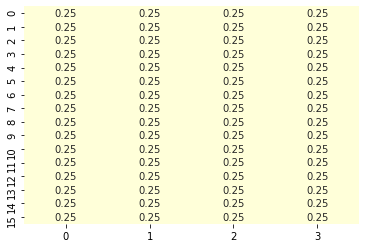

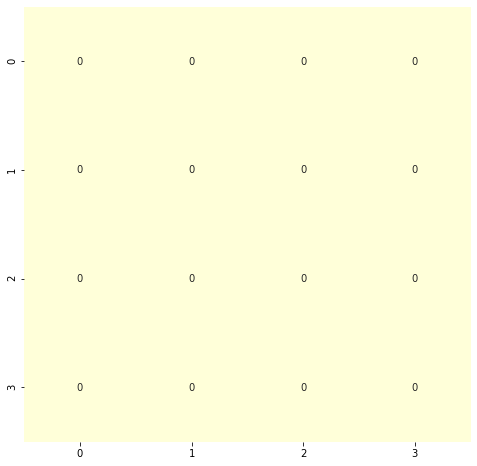

In [12]:
def random_policy_with_prob(n_states, n_actions):
    policy = np.ones([n_states, n_actions]) / n_actions
    return policy

policy = random_policy_with_prob(16, 4)
print(policy.shape)
# print(policy)

sns.heatmap(policy,  cmap="YlGnBu", annot=True, cbar=False);

# Plot heatmap of first V
V = np.zeros(env.observation_space.n)
plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(4, 4),  cmap="YlGnBu", annot=True, cbar=False);

In [17]:
def policy_evaluation(env, policy, theta=0.001):
    """
    Policy evaluation function. Loop until state values stable, delta < theta.
    Uses 2 separate V tables: V and V_prime
    Returns V updated under policy
    """

    # Create state-value array (16,)
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0.0
        V_prime = np.zeros(env.observation_space.n)
        # for all states
        for state in range(env.observation_space.n):
            # for all actions
            for action, action_prob in enumerate(policy[state]):
                for next_state_prob, next_state, reward, done in env.P[state][action]:  
                    V_prime[state] += action_prob * next_state_prob * (reward + V[next_state])
        
            delta = max(delta, np.abs(V[state]-V_prime[state]))

        # Update V
        V = V_prime

        if delta < theta:
            break

    return V

In [18]:
# Generate random policy 
policy = random_policy_with_prob(env.observation_space.n, env.action_space.n)

In [19]:
# policy evaluation
V = policy_evaluation(env, policy)


SFFF
FHFH
FFFH
HFFG


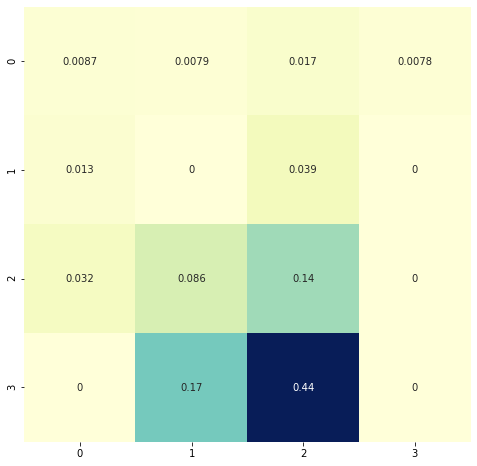

In [20]:
# Plot heatmap
env.reset()
env.render()
plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(4, 4),  cmap="YlGnBu", annot=True, cbar=False);